In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# d = df['d'].to_numpy()/1000
# v = np.array([0])
# plt.plot(d)
# for i in range(len(d)):
#     if(i==0):
#         continue
#     vel =(d[i]-d[i-1])/0.01
#     v = np.append(v,[vel])
# plt.plot(v)
# print(v)z

<AxesSubplot:xlabel='t'>

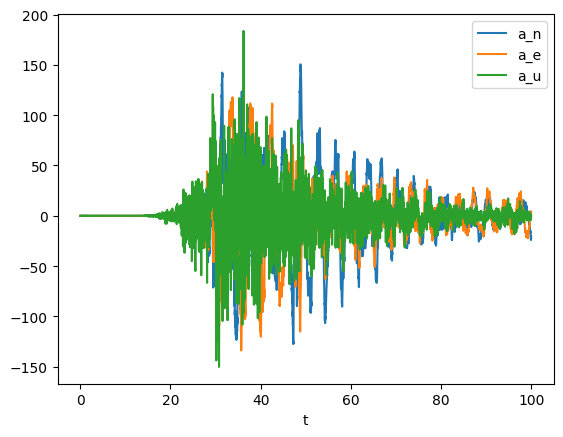

In [3]:
df_g = pd.read_fwf('gorkha_thimi.dat',header = None,skiprows = 34,colspecs = 'infer',infer_nrows = 10000)
columns = ['t','a_n','a_e','a_u']
df_g.columns = columns
df_g.plot('t')

In [4]:
def integrate(series):
    series = series*0.01
    series[0] = 0
#     df_g.loc[0,'v'] = 0
    return series.cumsum() 
# df_g.plot(x = 't', y = 'v')

<AxesSubplot:xlabel='t'>

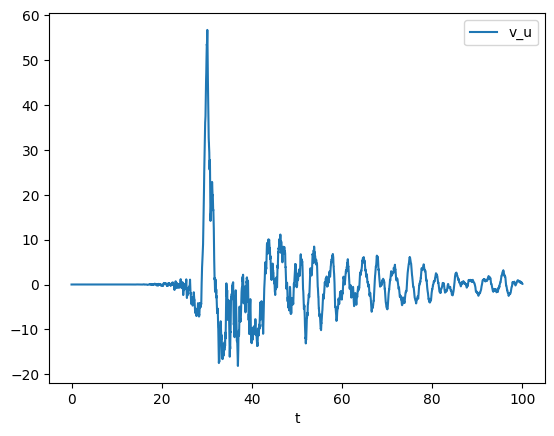

In [5]:
df_g['v_n'] = integrate(df_g['a_n'])
df_g['v_e'] = integrate(df_g['a_e'])
df_g['v_u'] = integrate(df_g['a_u'])
df_g.plot(x = 't', y = ['v_u'])

In [6]:
df_g['d_n'] = integrate(df_g['v_n'])
df_g['d_e'] = integrate(df_g['v_e'])
df_g['d_u'] = integrate(df_g['v_u'])

In [7]:
df_acceleration = df_g[['t','a_n','a_e','a_u']]
df_velocity = df_g[['t','v_n','v_e','v_u']]
df_displacement = df_g[['t','d_n','d_e','d_u']]

array([[<AxesSubplot:xlabel='t'>],
       [<AxesSubplot:xlabel='t'>],
       [<AxesSubplot:xlabel='t'>]], dtype=object)

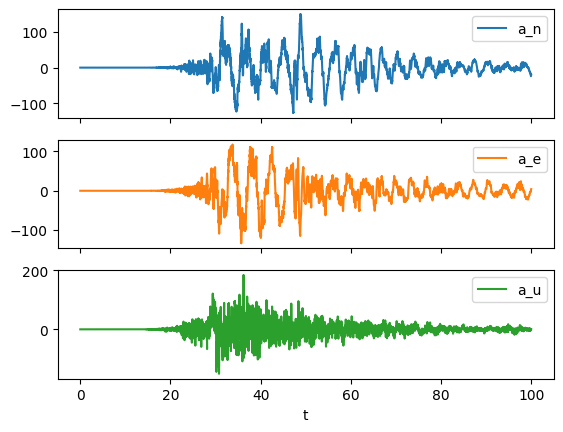

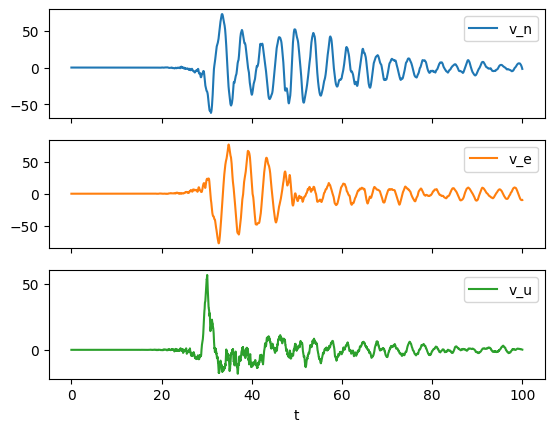

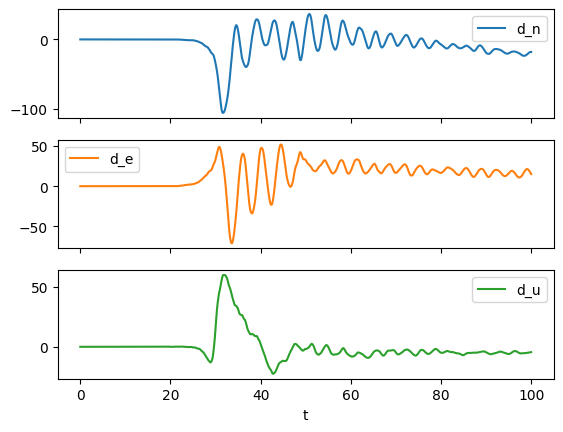

In [8]:
from matplotlib import pyplot as plt

df_acceleration.plot(x = 't', subplots = True, layout = (3,1))
df_velocity.plot(x = 't', subplots = True, layout = (3,1))
df_displacement.plot(x = 't', subplots = True, layout = (3,1))


In [9]:
# df_g['v_i'] = df_g['d'].diff()/0.005
# df_g.loc[0,'v_i'] = 0
# df_g['a_i'] = df_g['v'].diff()/0.005
# df_g.loc[0,'a_i'] = 0
# df_g

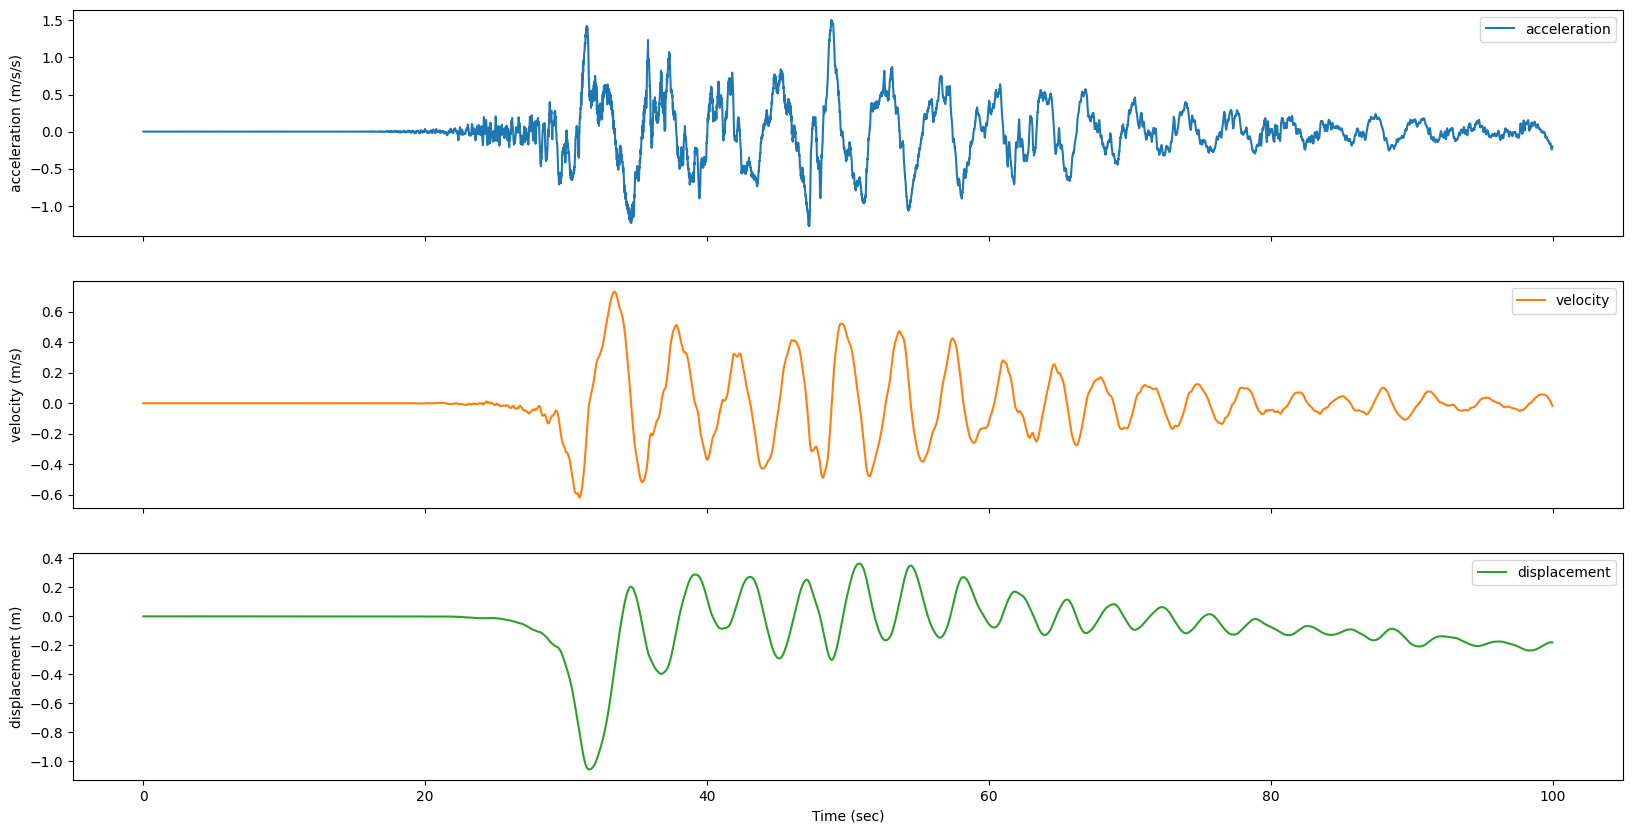

In [10]:
df_g
df_north = df_g[['t','a_n','v_n','d_n']]
df_north = df_north/100
df_north['t'] = df_north['t']*100
columns = ['time','acceleration', 'velocity', 'displacement']
df_north.columns = columns
ax = df_north.plot(x = 'time', subplots = True)
fig = ax[0].get_figure()
fig.set_figwidth(20)
fig.set_figheight(10)
# fig.suptitle('Processing Acceleration Data of 2015 Gorkha Earthquake')
ax[0].set_ylabel('acceleration (m/s/s)')
ax[1].set_ylabel('velocity (m/s)')
ax[2].set_ylabel('displacement (m)')
ax[2].set_xlabel('Time (sec)')
fig.savefig('gorkha_acc_to_disp')

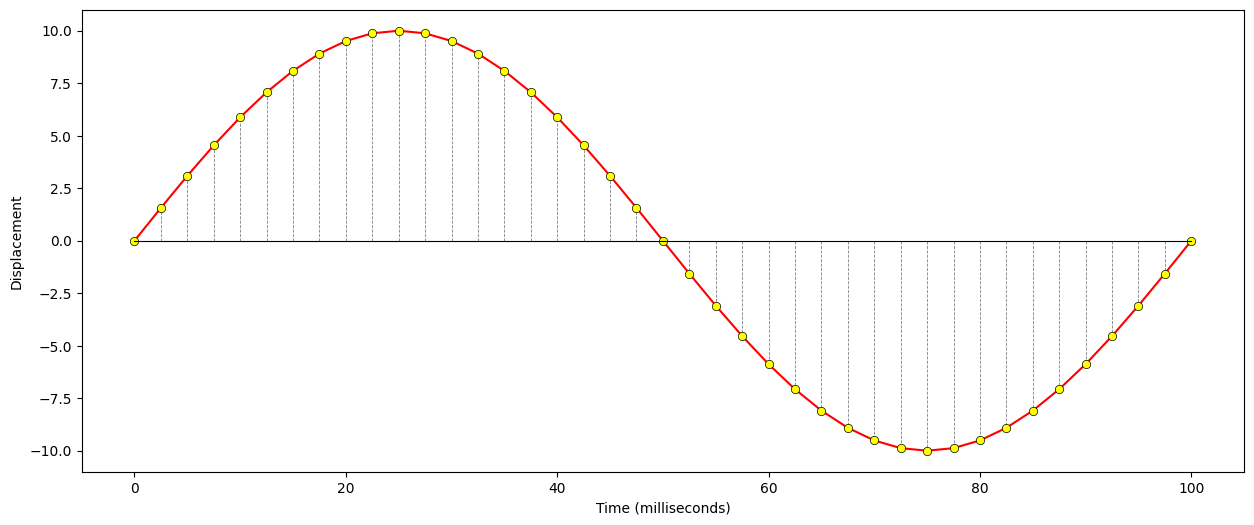

In [11]:
import math
t_sin = np.linspace(start = 0, stop = 100, num = 41)
rad = t_sin * 2 * math.pi * 10/1000
sin_wave = np.sin(rad)*10
# fig = plt.figure()
ax = plt.plot(t_sin,sin_wave,color = 'red')
fig = ax[0].get_figure()
# plt.step(t_sin,sin_wave)
marker, stem, base = plt.stem(t_sin,sin_wave,linefmt='grey', )
marker.set_markerfacecolor('yellow')
base.set(color = 'black',linewidth = 0.8)
stem.set(linewidth = 0.6, linestyle = '--')
marker.set(markeredgewidth = 0.5,markersize = 6, color = 'black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Displacement')
fig.set_figwidth(15)
fig.set_figheight(6)
fig.savefig('wave_discretization', dpi = 800)
import tikzplotlib

tikzplotlib.save("test.tex")

In [12]:

class WaterBoiler:
    """
    Simple simulation of a water boiler which can heat up water
    and where the heat dissipates slowly over time
    """

    def __init__(self):
        self.water_temp = 2

    def update(self, boiler_power, dt):
        if boiler_power > 0:
            # Boiler can only produce heat, not cold
            self.water_temp = self.water_temp + 100*boiler_power*dt
            
        # Some heat dissipation
        self.water_temp -= 0.02 * dt
        return self.water_temp
        

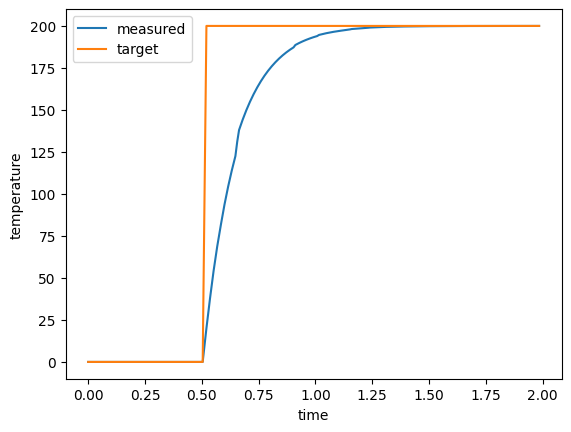

In [13]:
import time 
from simple_pid import PID

boiler = WaterBoiler()
water_temp = 0


pid = PID(0.1, 0, 0,setpoint=0)
pid.output_limits = (-50, 50)

start_time = time.time()
last_time = start_time

# Keep track of values for plotting
setpoint, y, x = [], [], []

while time.time() - start_time < 2:
    current_time = time.time()
    dt = current_time - last_time

    power = pid(water_temp)
#     water_temp = boiler.update(power, dt)
    water_temp = power + water_temp
    
    x += [current_time - start_time]
    y += [water_temp]
    setpoint += [pid.setpoint]
    
    if current_time - start_time > 0.5:
        pid.setpoint = 200

    last_time = current_time
    time.sleep(0.005)
    

plt.plot(x, y, label='measured')
plt.plot(x, setpoint, label='target')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
# if os.getenv('NO_DISPLAY'):
#     # If run in CI the plot is saved to file instead of shown to the user
#     plt.savefig(f"result-py{'.'.join([str(x) for x in sys.version_info[:2]])}.png")
# else:
plt.show()
perfect = y

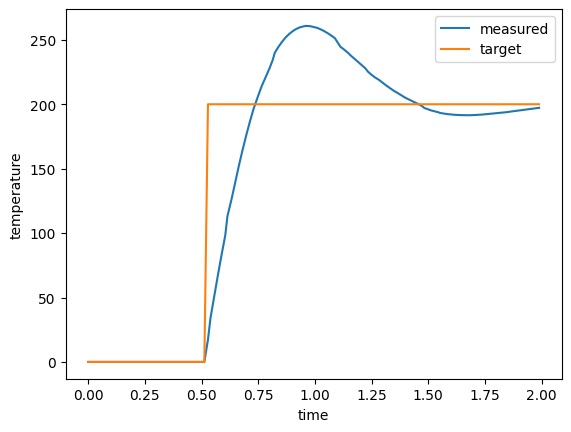

In [14]:
import time 

boiler = WaterBoiler()
water_temp = 0


pid = PID(0.08, 0.4, 0,setpoint=0)
pid.output_limits = (-50, 50)

start_time = time.time()
last_time = start_time

# Keep track of values for plotting
setpoint, y, x = [], [], []

while time.time() - start_time < 2:
    current_time = time.time()
    dt = current_time - last_time

    power = pid(water_temp)
#     water_temp = boiler.update(power, dt)
    water_temp = power + water_temp
    
    x += [current_time - start_time]
    y += [water_temp]
    setpoint += [pid.setpoint]
    
    if current_time - start_time > 0.5:
        pid.setpoint = 200

    last_time = current_time
    time.sleep(0.005)
    

plt.plot(x, y, label='measured')
plt.plot(x, setpoint, label='target')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
# if os.getenv('NO_DISPLAY'):
#     # If run in CI the plot is saved to file instead of shown to the user
#     plt.savefig(f"result-py{'.'.join([str(x) for x in sys.version_info[:2]])}.png")
# else:
plt.show()
fast = y

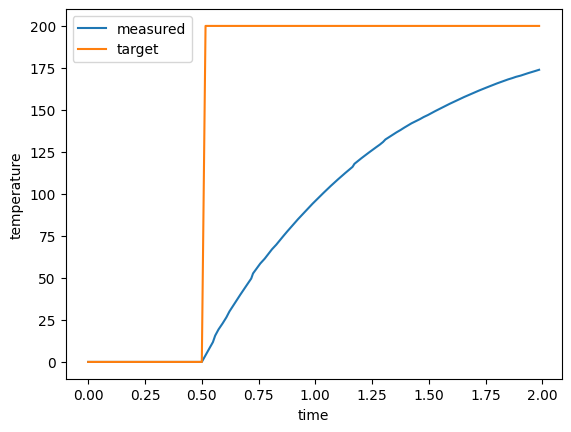

In [15]:
import time 

boiler = WaterBoiler()
water_temp = 0


pid = PID(0.02, 0.001, 0,setpoint=0)
pid.output_limits = (-50, 50)

start_time = time.time()
last_time = start_time

# Keep track of values for plotting
setpoint, y, x = [], [], []

while time.time() - start_time < 2:
    current_time = time.time()
    dt = current_time - last_time

    power = pid(water_temp)
#     water_temp = boiler.update(power, dt)
    water_temp = power + water_temp
    
    x += [current_time - start_time]
    y += [water_temp]
    setpoint += [pid.setpoint]
    
    if current_time - start_time > 0.5:
        pid.setpoint = 200

    last_time = current_time
    time.sleep(0.005)
    

plt.plot(x, y, label='measured')
plt.plot(x, setpoint, label='target')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
# if os.getenv('NO_DISPLAY'):
#     # If run in CI the plot is saved to file instead of shown to the user
#     plt.savefig(f"result-py{'.'.join([str(x) for x in sys.version_info[:2]])}.png")
# else:
plt.show()
slow = y

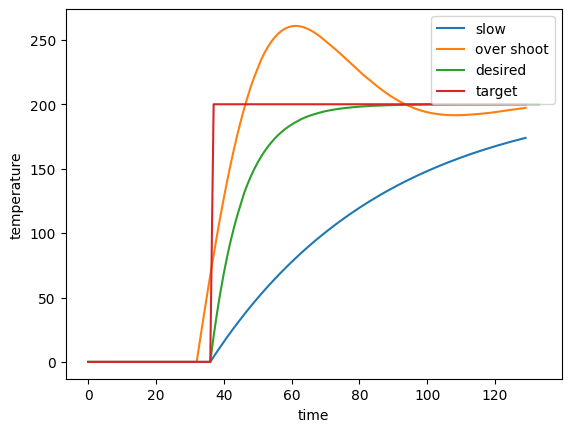

In [19]:
plt.plot(slow, label='slow')
plt.plot(fast, label='over shoot')
plt.plot(perfect, label='desired')
plt.plot(setpoint, label='target')
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend()
tikzplotlib.save("response_types_p.tex")

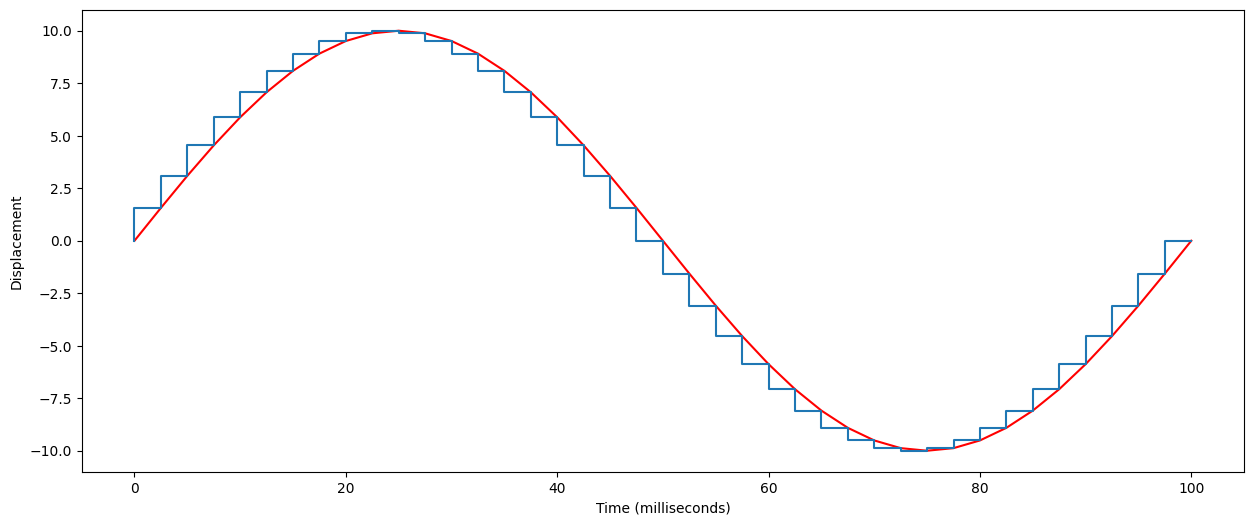

In [17]:
ax = plt.plot(t_sin,sin_wave,color = 'red')
fig = ax[0].get_figure()
plt.step(t_sin,sin_wave)

plt.xlabel('Time (milliseconds)')
plt.ylabel('Displacement')
fig.set_figwidth(15)
fig.set_figheight(6)
tikzplotlib.save("step_graph.tex")

In [18]:
# pid = PID(0.1, 0.01, 0,setpoint=0)
# pid.output_limits = (-2, 2)

# start_time = time.time()
# last_time = start_time
# water_temp = 0
# # Keep track of values for plotting
# setpoint, y, x = [], [], []
# for s in sin_wave:
    
#     pid.setpoint = s

#     while time.time() - last_time < 0.1:
#         current_time = time.time()
#         dt = current_time - last_time

#         power = pid(water_temp)
#     #     water_temp = boiler.update(power, dt)
#         water_temp = power + water_temp

#         x += [current_time - start_time]
#         y += [water_temp]
#         setpoint += [pid.setpoint]
 
#     last_time = current_time
        

# plt.plot(x,y)
    